# 1. Linear regression summary

## 1.1 numpy implementation from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1.1 toy data

In [4]:
np.random.seed(42)
m, n = 100, 3
X = np.random.randn(m, n)
w_true = np.array([[2], [-1], [3]])
b_true = 0.5
y = X @ w_true + b_true + np.random.randn(m, 1) * 0.5

### 1.1.2 numpy with gradient descent

In [5]:
# initial w and b
w = np.random.randn(n, 1)
b = 0

# hyperparameter
lr = 0.05
epochs = 1000
losses = []

# train
for epoch in range(epochs):
    y_pred = X @ w + b
    error = y_pred - y
    loss = np.mean(error ** 2)
    losses.append(loss)

    #get gradient
    dw = X.T @ error / m
    db = np.sum(error) / m

    #update w and b
    w = w - lr * dw
    b = b - lr * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

print(f"Trained weights: {w}, bias: {b}")
print(f"True weights: {w_true}, true bias: {b_true}")

Epoch 0: Loss = 19.0331
Epoch 100: Loss = 0.2046
Epoch 200: Loss = 0.1892
Epoch 300: Loss = 0.1892
Epoch 400: Loss = 0.1892
Epoch 500: Loss = 0.1892
Epoch 600: Loss = 0.1892
Epoch 700: Loss = 0.1892
Epoch 800: Loss = 0.1892
Epoch 900: Loss = 0.1892
Trained weights: [[ 1.96116836]
 [-1.02498178]
 [ 2.94620334]], bias: 0.5564311456858692
True weights: [[ 2]
 [-1]
 [ 3]], true bias: 0.5


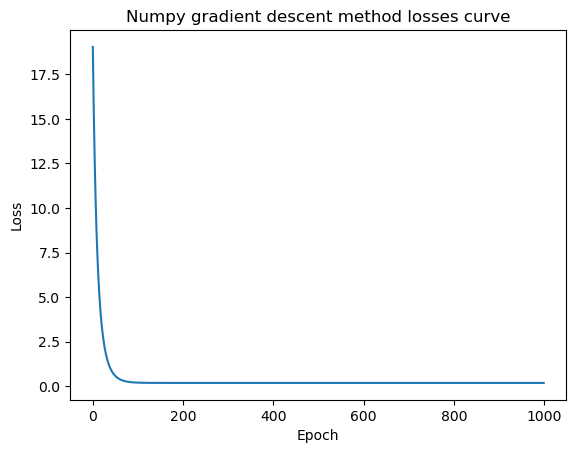

In [6]:
plt.plot(losses)
plt.title("Numpy gradient descent method losses curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### 1.1.3 numpy with closed-form

In [8]:
#add bias to X
X_b = np.c_[np.ones((m, 1)), X] #shape (m, 4)

In [10]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [11]:
print("Estimated θ:", theta_best.ravel())
print("True w:", true_w.ravel())
print("True b:", true_b)

Estimated θ: [ 0.55643115  1.96116836 -1.02498178  2.94620334]
True w: [ 2 -1  3]
True b: 0.5


## 1.2 Pytorch

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

In [23]:
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()


In [24]:
model = nn.Linear(n, 1)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
losses = []

In [25]:
#train
for epoch in range(epochs):
    y_pred = model(X_tensor)
    loss = loss_fn(y_pred, y_tensor)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Learned weight:", model.weight.detach().numpy())
print("Learned bias:", model.bias.item())
print("True w:", true_w.ravel())
print("True b:", true_b)

Learned weight: [[ 1.9611673 -1.0249825  2.9462023]]
Learned bias: 0.5564314723014832
True w: [ 2 -1  3]
True b: 0.5


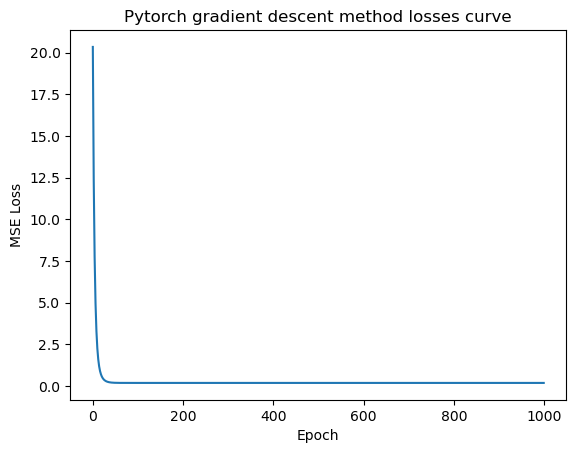

In [26]:
plt.plot(losses)
plt.title("Pytorch gradient descent method losses curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

## 1.3 Sklearn

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Estimated coef_:", lin_reg.coef_.ravel())
print("Estimated intercept_:", lin_reg.intercept_)
print("True w:", w_true.ravel())
print("True b:", b_true)

Estimated coef_: [ 1.96116836 -1.02498178  2.94620334]
Estimated intercept_: [0.55643115]
True w: [ 2 -1  3]
True b: 0.5


# 2. Regularization

## 2.1 Sklearn and regularization

In [28]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

In [29]:
n_samples = 100
n_features = 1
X = 2 * np.random.randn(n_samples, n_features)
coef_true = 3.5
y = X.flatten() * coef_true + np.random.randn(n_samples) * 0.8

In [30]:
X.shape

(100, 1)

In [31]:
X.flatten().shape

(100,)

In [32]:
y.shape

(100,)

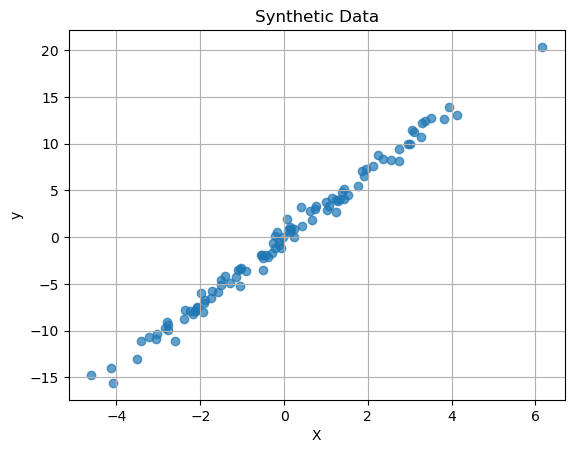

In [34]:
plt.scatter(X, y, alpha=0.7)
plt.title("Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [35]:
# different powers of regularization

In [36]:
alphas = [0.01, 0.1, 1, 10]

ridge_coefs = []
lasso_coefs = []

In [38]:
for alpha in alphas:
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    lasso = make_pipeline(StandardScaler(), Lasso(alpha=alpha, max_iter=10000))

    ridge.fit(X, y)
    lasso.fit(X, y)

    ridge_coef = ridge.named_steps["ridge"].coef_[0]
    lasso_coef = lasso.named_steps["lasso"].coef_[0]

    ridge_coefs.append(ridge_coef)
    lasso_coefs.append(lasso_coef)

In [39]:
results = pd.DataFrame({
    "Alpha": alphas,
    "Ridge Coef": ridge_coefs,
    "Lasso Coef": lasso_coefs
})
results

,Alpha,Ridge Coef,Lasso Coef
0,0.01,7.474980,7.465727
1,0.10,7.468259,7.375727
2,1.00,7.401710,6.475727
3,10.00,6.796116,0.000000


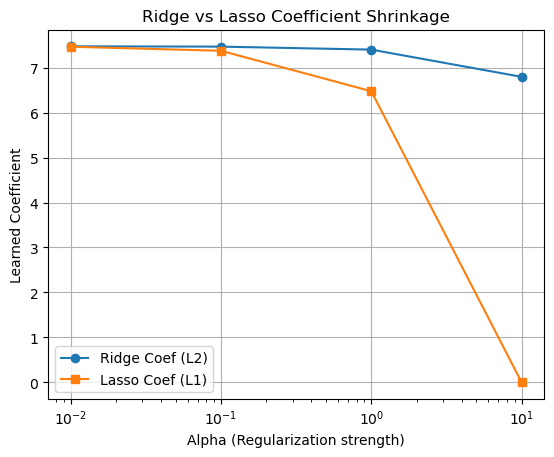

In [40]:
# 可视化比较
plt.plot(alphas, ridge_coefs, marker='o', label='Ridge Coef (L2)')
plt.plot(alphas, lasso_coefs, marker='s', label='Lasso Coef (L1)')
plt.xscale('log')
plt.xlabel("Alpha (Regularization strength)")
plt.ylabel("Learned Coefficient")
plt.title("Ridge vs Lasso Coefficient Shrinkage")
plt.legend()
plt.grid(True)
plt.show()

## 2.2 numpy and regularization

### 2.2.1 closed form

Lasso (L1) does not have closed form method since not differentiable.

Ridge (L2) has

In [41]:
np.random.seed(42)
m, n = 100, 3
X = np.random.randn(m, n)
w_true = np.array([[2], [-1], [3]])
b_true = 0.5
y = X @ w_true + b_true + np.random.randn(m, 1) * 0.5

In [43]:
X_b = np.c_[np.ones((m, 1)), X]
lambda_ridge = 0.1
I = np.eye(X_b.shape[1])
I[0, 0] = 0 #not regularize the bias term

In [44]:
I.shape

(4, 4)

In [45]:
I

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [48]:
theta_best_ridge = np.linalg.inv(X_b.T @ X_b + lambda_ridge * I) @ X_b.T @ y 
print("Closed-form Ridge Weights + Bias:", theta_best_ridge.ravel())
print("True w:", true_w.ravel())
print("True b:", true_b)

Closed-form Ridge Weights + Bias: [ 0.55703639  1.95786549 -1.02440819  2.94356973]
True w: [ 2 -1  3]
True b: 0.5


### 2.2.2 numpy regularization (Elastic Net) with gradient descent

In [49]:
# 初始化参数
w = np.random.randn(n, 1)
b = 0

# 超参数
lr = 0.05
epochs = 1000
l1_lambda = 0.1
l2_lambda = 0.1
losses = []

In [52]:
#train
for epoch in range(epochs):
    y_pred = X @ w + b
    error = y_pred - y

    mse_loss = np.mean(error ** 2)
    l1_penalty = l1_lambda * np.sum(np.abs(w))
    l2_penalty = l2_lambda * np.sum(w ** 2)
    loss = mse_loss + l1_penalty + l2_penalty
    losses.append(loss)

    dw = (X.T @ error) / m + l1_lambda * np.sign(w) +2 * l2_lambda * 2
    db = np.mean(error) / m

    w = w - lr * dw
    b = b - lr * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

print("Trained weights (L1+L2):", w.ravel())
print("True weights:", w_true.ravel())

Epoch 0: Loss = 19.5431
Epoch 100: Loss = 2.8601
Epoch 200: Loss = 2.7356
Epoch 300: Loss = 2.7055
Epoch 400: Loss = 2.6811
Epoch 500: Loss = 2.6590
Epoch 600: Loss = 2.6388
Epoch 700: Loss = 2.6204
Epoch 800: Loss = 2.6036
Epoch 900: Loss = 2.5883
Trained weights (L1+L2): [ 1.15543807 -1.51412308  2.43454552]
True weights: [ 2 -1  3]
True w: [ 2 -1  3]
True b: 0.5


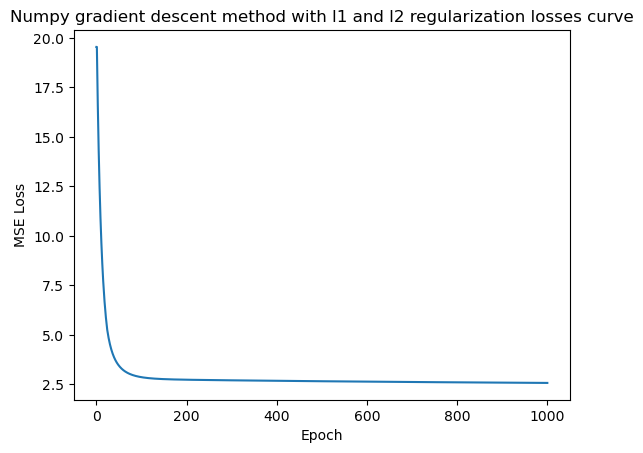

In [53]:
plt.plot(losses)
plt.title("Numpy gradient descent method with l1 and l2 regularization losses curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

# 3.Decision Tree & Random Forest

## 3.1 using sklearn

### 3.1.1 Making toy data

In [54]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=300, n_features=4, n_informative=3, n_redundant=0, random_state=42, class_sep=1.5)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

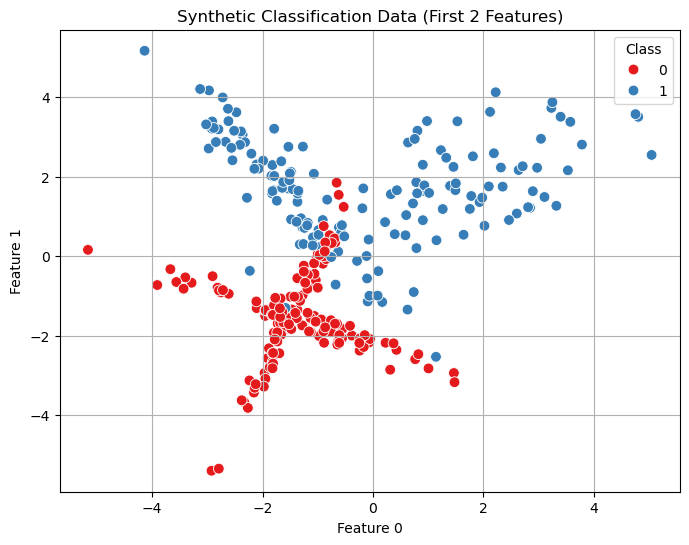

In [56]:
import seaborn as sns

# 假设我们只画前两个维度
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', s=60)
plt.title("Synthetic Classification Data (First 2 Features)")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(title="Class")
plt.grid(True)
plt.show()

### 3.1.2 decision tree model

In [57]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

### 3.1.3 random forest model

In [58]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)

### 3.1.4 Evaluation

In [59]:
from sklearn.metrics import accuracy_score

tree_acc = accuracy_score(y_test, y_pred_tree)
forest_acc = accuracy_score(y_test, y_pred_forest)

print(f"✅ Decision Tree Accuracy: {tree_acc:.4f}")
print(f"✅ Random Forest Accuracy: {forest_acc:.4f}")

✅ Decision Tree Accuracy: 0.9222
✅ Random Forest Accuracy: 0.9333


### 3.1.5 compare the features

In [60]:
feature_names = [f"Feature {i}" for i in range(X.shape[1])]
tree_importances = tree_clf.feature_importances_
forest_importances = forest_clf.feature_importances_

df = pd.DataFrame({
    'Feature': feature_names,
    'Tree Importance': tree_importances,
    'RF Importance': forest_importances
})
df

,Feature,Tree Importance,RF Importance
0,Feature 0,0.097973,0.151305
1,Feature 1,0.861395,0.656701
2,Feature 2,0.000000,0.035188
3,Feature 3,0.040632,0.156806


### 3.1.6 visualize the tree

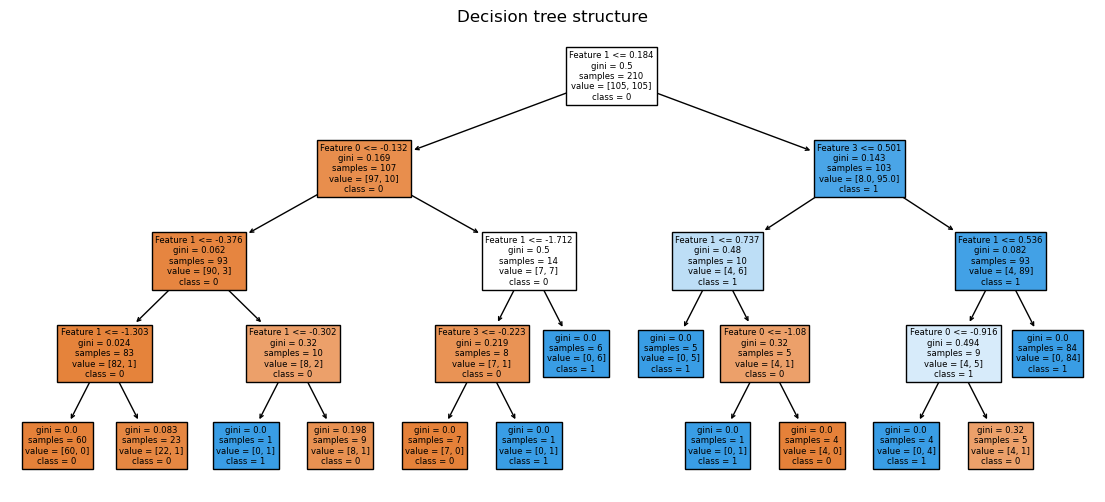

In [61]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 6))
plot_tree(tree_clf, feature_names=feature_names, filled=True, class_names=["0", "1"])
plt.title("Decision tree structure")
plt.show()